# Robust Regression

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns   
sns.set(color_codes=True)
import matplotlib.pyplot as plt 
import warnings
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Robust Regression allows us to ignore the effect that outliers have on the linear regression 
## Sklearn uses Random Sample Consensus (RANSAC) Algorithm:
1. Select ```min_samples``` random samples the original data and check if data is valid (```is_data_valid```)
2. Fit model to the random subset and check whether the model is valid 
3. Classify all data as inliers or outliers by calculating the residuals to the estimated model. All data samples with absolute residuals smaller than the ```residual_threshold``` are considered inliers
4. Save fitted model as the best model if the number of inlier samples is maximal

One way to make data more linear, keep assumptions of linear regression satisfied

In [4]:
from sklearn.linear_model import RANSACRegressor

In [5]:
X = boston['RM'].values.reshape(-1, 1)
y = boston['MEDV'].values

In [15]:
ransac = RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor()

In [8]:
# create masks to get only inliers (non-outliers)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [11]:
line_X = np.arange(3,10)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

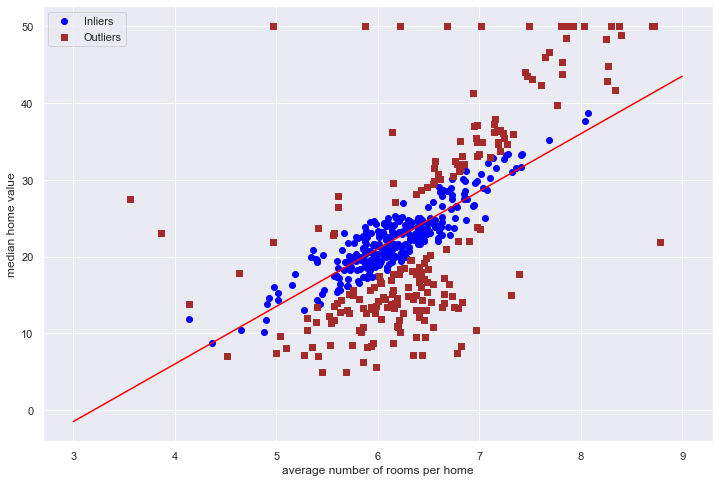

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(
    X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers'
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outliers'
)
plt.plot(line_X, line_y_ransac, color='red')
plt.legend(loc='upper left')
plt.xlabel('average number of rooms per home')
plt.ylabel('median home value')
plt.show()

### Note ultimate difference in slope/intercept from traditional linear model

In [20]:
ransac.estimator_.coef_

array([10.32952838])

In [21]:
ransac.estimator_.intercept_

-41.13606470034205